<a href="https://colab.research.google.com/github/jhowsilvaa/Analise_de_dados_do_panorama_do_COVID_19_na_Finlandia/blob/main/Panorama_do_COVID_19_na_Finl%C3%A2ndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Panorama do COVID-19 na Finlândia**
-----

A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2 com potencial grave, altamente transmissível e distribuição global.


O virus é transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, ocasionando sintomas como tosse, febre, cansaço, dores pelo corpo e dificuldade para respirar.

 Atualmente não existe medicamento específico para a covid-19. A principal forma de se proteger e evitar o aumento do número de casos e o desenvolvimento de novas variantes da doença é a vacinação.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 na Finlândia, irei realizar uma análise sobre os dados públicos da doença.




<center>
<img alt="Colaboratory logo" width="75%"  src="https://user-images.githubusercontent.com/121787728/211541151-60e6f57e-069e-46c8-a564-c74850eec7ca.png">
</center>

Antes de iniciarmos a analise, é importante que tenhamos uma noção geral sobre a Finlândia e suas características. Vamos fazer uma breve introdução para conhecermos melhor esse país situado no norte da Europa, conhecido pela sua natureza exuberante e pela sua incrível exibição de auroras boreais.

A Finlândia é um país europeu situado ao norte do continente, com uma população de mais de 5,5 milhões de habitantes. Sua capital, Helsinki, fica no sul do país e tem uma rica história cultural e arquitetônica. O território finlandês é banhado pelo Mar Báltico ao sul e oeste e compartilha fronteiras com a Suécia, Noruega e Rússia.

O país nórdico é conhecido por sua natureza selvagem e belas paisagens, mas também é altamente industrializado e tecnologicamente avançado. A maior parte da população finlandesa vive na parte sul do país, especialmente na região de Uusimaa, devido ao clima rigoroso no norte. A população finlandesa tem uma expectativa de vida longa e saudável, mas o crescimento populacional é lento, com uma taxa de crescimento anual de apenas 0,26%.

A economia finlandesa é baseada em livre mercado e é altamente diversificada, com setores fortes em tecnologia, comunicações e indústria. Isso se reflete em sua renda per capita, que é comparável à de outros países desenvolvidos da Europa, como Áustria, Bélgica, Holanda e Suécia. A Finlândia possui uma ampla rede de infraestrutura, incluindo transporte, educação, saúde e serviços públicos, para atender às necessidades da população tanto nas cidades quanto no campo.

## **Importação de dados** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/128/2854/2854088.png">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from rich.console import Console
from rich import print
from rich.panel import Panel
from rich.layout import Layout
import seaborn as sns
%matplotlib inline


<p align="center"> 
Todos os dados usados aqui foram obtidos a partir do site <a href="https://github.com/owid/covid-19-data/tree/master/public/data">owid</a>
</p>
<p align="center"> 
<img align="center" alt="Colaboratory logo" width="25%" src="https://i.pinimg.com/originals/d7/ae/01/d7ae0170d3d5ffcbaa7f02fdda387a3b.gif">



<p align="center"> 
Para esta análise exploratória, será baixado apenas o seguinte arquivo:
</p>
<p> 
<li align="center"><b>owid-covid-data.csv</b> - uma coleção dos dados COVID-19 inspirados por <a href="https://ourworldindata.org/coronavirus">our World in Data</a>.</p>

Os dados que our world in data disponibiliza são da <a href="https://coronavirus.jhu.edu/map.html">Johns Hopkins University</a> (JHU). 

A JHU é uma das fontes de dados mais importantes para o monitoramento global da pandemia de COVID-19.


In [ ]:
# Criando uma cópia do DataFrame apenas com os Paises nórdicos
df_covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
nordic_countries = ['Finland', 'Denmark', 'Norway', 'Sweden', 'Iceland']
df_nordic = df_covid[df_covid['location'].isin(nordic_countries)].copy()


In [ ]:
world = df_covid[df_covid['location'] == 'World'].copy()  

## **Dicionário de Variáveis** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/512/3579/3579773.png">
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.


* As variáveis ​​representam todos os principais dados relacionados a casos confirmados, óbitos, internações e testes, bem como outras variáveis ​​​​de interesse potencial.

* `iso_code`:	código de três letras do país
*	`continent`:	Continente da localização
*	`location`:	Localização geográfica
*	`date`:	Data de observação
*	`total_cases`:	Total de casos confirmados de COVID-19
*	`new_cases`:	Novos casos: confirmados de COVID-19
*	`new_cases_smoothed`:	Novos casos confirmados de COVID-19 (7 dias suavizados)
*	`total_deaths`:	Total de mortes atribuídas à COVID-19
*	`new_deaths`:	Novas mortes atribuídas à COVID-19
* `new_deaths:_smoothed`:	Novas mortes atribuídas à COVID-19 (7 dias suavizados)
* `total_cases_per_million`:	Total de casos acumulados confirmados de COVID-19 por * 1 milhão de pessoas
*  `total_boosters`: Número total de doses de reforço da vacina administradas.
*   `total_boosters_per_hundred`: Número total de doses de reforço da vacina administrada por 100 pessoas
* `new_cases_per_million`:	Novos casos confirmados de COVID-19 por 1 milhão de pessoas
* `new_cases_smoothed_per_million`:	Média móvel de 7 dias de novos casos confirmados de COVID-19 por 1 milhão de pessoas
* `total_deaths_per_million`:	Total de mortes acumuladas atribuídas a COVID-19 por 1 milhão de pessoas
* `new_deaths_per_million`:	Novas mortes atribuídas a COVID-19 por 1 milhão de pessoas
* `new_deaths_smoothed_per_million`:	Média móvel de 7 dias em relação a novas mortes atribuídas a COVID-19 por 1 milhão de pessoas
* `reproduction_rate`:	Estimativa em tempo real da taxa de reprodução efetiva (R) da COVID-19
* `icu_patients`:	Número de pacientes COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia
* `icu_patients_per_million`:	Número de pacientes COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 de pessoas
* `hosp_patients`:	Número de pacientes da COVID-19 no hospital em um determinado dia
* `hosp_patients_per_million`:Número de pacientes COVID-19 no hospital por 1 milhão de pessoas;
* `weekly_icu_admissions`: Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI)
* `weekly_icu_admissions_per_million`:Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) por 1 milhão de pessoas;
* `weekly_hosp_admissions`:Número de pacientes COVID-19 recém-admitidos em hospitais;
* `weekly_hosp_admissions_per_million`:Número de pacientes COVID-19 recém-admitidos em hospitais por 1 milhão de pessoas;
* `total_tests`: Total de testes acumulados para COVID-19;
* `new_tests`: Novos testes para COVID-19;
* `total_tests_per_thousand`:Total de testes acumulados para COVID-19 por mil pessoas;
* `new_tests_per_thousand`: Novos testes para COVID-19 por mil pessoas;
* `new_tests_smoothed`: Média móvel de 7 dias de novos testes para COVID-19;
* `new_tests_smoothed_per_thousand`: Média móvel de 7 dias de novos testes para COVID-19 por mil pessoas;
* `positive_rate`: A parcela de testes COVID-19 que são positivos, dada como uma média contínua de 7 dias;
* `tests_per_case`: Testes conduzidos por novo caso confirmado de COVID-19, dado como uma média contínua de 7 dias;
* `tests_units`: Unidades usadas pelo local para relatar seus dados de teste;


* `total_vaccinations`: Número total de doses de vacinação COVID-19 administradas;
* `people_vaccinated`: Número total de pessoas que receberam pelo menos uma dose de vacina;
* `people_fully_vaccinated`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação;
* `new_vaccinations`: Novas doses de vacinação COVID-19 administradas;
* `new_vaccinations_smoothed`: Média móvel de 7 dias novas doses de vacinação COVID-19 administradas;
* `total_vaccinations_per_hundred`: Número total de doses de vacinação COVID-19 por 100 pessoas;
* `people_vaccinated_per_hundred`: Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas;
* `people_fully_vaccinated_per_hundred`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas; 
* `new_vaccinations_smoothed_per_million`: Média móvel de 7 dias em relação a Novas doses de vacinação COVID-19 administradas por 1 milhão de pessoas;
* `stringency_index`: Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais restrita)
* `population_density`: Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível;
* `median_age`: Idade média da população, projeção da ONU para 2020
* `aged_65_older`: Parcela da população com 65 anos ou mais, ano mais recente disponível;
* `aged_70_older`: Parcela da população com 70 anos ou mais em 2015;
* `gdp_per_capita`: Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível;
* `extreme_poverty`: Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010;
* `cardiovasc_death_rate`: Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas);
* `diabetes_prevalence`: Prevalência de diabetes (% da população de 20 a 79 anos) em 2017;
* `female_smokers`: Parcela de mulheres que fumam, ano mais recente disponível;
* `male_smokers`: Parcela de homens que fumam, ano mais recente disponível; 
* `handwashing_facilities`: Parcela da população com instalações básicas para lavagem das mãos no local, ano mais recente disponível;
* `hospital_beds_per_thousand`: Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010;
* `life_expectancy`: Expectativa de vida ao nascer em 2019;
* `human_development_index`: Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano - uma vida longa e saudável, conhecimento e um padrão de vida decente.
* `population`: População (últimos valores disponíveis)
* `excess_mortality_cumulative_absolute`:Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores.
* `excess_mortality_cumulative`: Diferença percentual entre o número acumulado de mortes desde 1º de janeiro de 2020 e as mortes projetadas cumulativas para o mesmo período com base nos anos anteriores.
* `excess_mortality`:Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período com base nos anos anteriores.

* `excess_mortality_cumulative_per_million`: Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores, por milhão de pessoas

## **Análise Exploratória dos Dados** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/512/5106/5106045.png">

💹 Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
df_nordic.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
59921,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,NaN,2.5,80.9,0.94,5882259.0,-273.0,-4.76,-7.23,-46.86182
59922,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,NaN,2.5,80.9,0.94,5882259.0,NaN,NaN,NaN,NaN
59923,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,NaN,2.5,80.9,0.94,5882259.0,NaN,NaN,NaN,NaN
59924,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,NaN,2.5,80.9,0.94,5882259.0,NaN,NaN,NaN,NaN
59925,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,NaN,2.5,80.9,0.94,5882259.0,NaN,NaN,NaN,NaN


###**1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui ❔ Quais os tipos das variáveis ❔**

* Vamos dar uma olhada em quantos registros nosso conjunto de dados possui e e observar o tipo de cada coluna.


In [ ]:
#@title **Visualize as informações no card 👇**
console = Console(height=40, width=130)
layout = Layout()
layout.split_column(
    Layout(name='center')
  )

layout['center'].split_row(
    Layout(Panel(f'''\n[bright_white]Entradas: {df_nordic.shape[0]}
Variaveis:[bright_white] {df_nordic.shape[1]}[/]

[bright_white]{df_nordic.dtypes.head(33)}[/]''', 
expand=False, style='bright_cyan  on grey11', 
title='[bright_white]Tipo de Variaveis[/]'), size=50),
    Layout(Panel(f'''\n \n \n[bright_white]{df_nordic.dtypes[34:67]}[/]''', 
    expand=False, style='bright_cyan  on grey11', 
    title='[bright_white]Tipo de Variaveis[/]'), size=100),


    Layout(Panel(f'''\n \n \n[bright_white]{df_nordic.dtypes[46:68]}[/]''', 
    expand=False, style='bright_cyan  on grey11', 
    title='[bright_white]Tipo de Variaveis[/]'), size=200),
)






console.print(layout)

╭────────────── Tipo de Variaveis ──────────────╮ ╭────────────────── Tipo de Variaveis ──────────────────╮                       
│                                               │ │                                                       │                       
│ Entradas: 5501                                │ │                                                       │                       
│ Variaveis: 67                                 │ │                                                       │                       
│                                               │ │ total_vaccinations                            float64 │                       
│ iso_code                               object │ │ people_vaccinated                             float64 │                       
│ continent                              object │ │ people_fully_vaccinated                       float64 │                       
│ location                               object │ │ total_boosters                                float64 │                       
│ date                                   object │ │ new_vaccinations                              float64 │                       
│ total_cases                           float64 │ │ new_vaccinations_smoothed                     float64 │                       
│ new_cases                             float64 │ │ total_vaccinations_per_hundred                float64 │                       
│ new_cases_smoothed                    float64 │ │ people_vaccinated_per_hundred                 float64 │                       
│ total_deaths                          float64 │ │ people_fully_vaccinated_per_hundred           float64 │                       
│ new_deaths                            float64 │ │ total_boosters_per_hundred                    float64 │                       
│ new_deaths_smoothed                   float64 │ │ new_vaccinations_smoothed_per_million         float64 │                       
│ total_cases_per_million               float64 │ │ new_people_vaccinated_smoothed                float64 │                       
│ new_cases_per_million                 float64 │ │ new_people_vaccinated_smoothed_per_hundred    float64 │                       
│ new_cases_smoothed_per_million        float64 │ │ stringency_index                              float64 │                       
│ total_deaths_per_million              float64 │ │ population_density                            float64 │                       
│ new_deaths_per_million                float64 │ │ median_age                                    float64 │                       
│ new_deaths_smoothed_per_million       float64 │ │ aged_65_older                                 float64 │                       
│ reproduction_rate                     float64 │ │ aged_70_older                                 float64 │                       
│ icu_patients                          float64 │ │ gdp_per_capita                                float64 │                       
│ icu_patients_per_million              float64 │ │ extreme_poverty                               float64 │                       
│ hosp_patients                         float64 │ │ cardiovasc_death_rate                         float64 │                       
│ hosp_patients_per_million             float64 │ │ diabetes_prevalence                           float64 │                       
│ weekly_icu_admissions                 float64 │ │ female_smokers                                float64 │                       
│ weekly_icu_admissions_per_million     float64 │ │ male_smokers                                  float64 │                       
│ weekly_hosp_admissions                float64 │ │ handwashing_facilities                        float64 │                       
│ weekly_hosp_admissions_per_million    float64 │ │ hospital_beds_per_thousand                    float64 │                       
│ total_tests                           float64 │ │ life_expectancy   

* É possivel constatar que **94%** dos nossos dados são do tipo `float64`, enquanto que outros **6%** pertecem ao tipo `object`.


* Identificamos que a variável `date` possui o tipo incorreto (`object`), o tipo apropriado para esta variável é `datetime`.

In [ ]:
df_nordic.date = pd.to_datetime(df_nordic.date,format='%Y-%m-%d')


###  **2. Qual a porcentagem de valores ausentes❔**  


É importante saber a porcentagem de dados ausentes antes de começar a analisar os dados, pois isso ajuda a tomar decisões informadas sobre como lidar com esses dados faltantes. Isso pode incluir descartar registros com muitos dados ausentes ou usar técnicas para preencher esses espaços vazios.

***A presença de dados ausentes pode ter um impacto significativo nas análises estatísticas, e a ignorância dessa questão pode levar a conclusões incorretas e a inferências equivocadas (Little & Rubin, 2002).***

In [ ]:
#@title **Visualize as informações no card 👇**
console = Console(height=28)
df_null = np.divide(df_nordic.isnull().sum(), len(df_nordic))*100
df_null = df_null.sort_values(ascending=False).round(2)


layout = Layout()
layout.split_column(
    Layout(name='center')
  )


panel= Layout(Panel(f'''
[bright_white]{df_null.head(25)}[/]''', 
expand=False, style='deep_sky_blue1 on grey11', 
title='[bright_white]% de dados ausentes[/]'))

panel_two = Layout(Panel(f'''
[bright_white]{df_null[26:50]}[/]''', 
expand=False, style='deep_sky_blue1  on grey11', 
title='[bright_white]% de dados ausentes[/]'))

layout['center'].split_row(
    panel, panel_two
    )

console.print(layout)




╭─────────────── % de dados ausentes ───────────────╮    ╭────────── % de dados ausentes ───────────╮              
│                                                   │    │                                          │              
│ handwashing_facilities                     100.00 │    │ new_tests_smoothed                 26.23 │              
│ weekly_icu_admissions_per_million           97.40 │    │ new_tests_smoothed_per_thousand    26.23 │              
│ weekly_icu_admissions                       97.40 │    │ total_tests                        25.94 │              
│ excess_mortality_cumulative_per_million     86.44 │    │ new_tests                          25.94 │              
│ excess_mortality                            86.44 │    │ total_tests_per_thousand           25.94 │              
│ excess_mortality_cumulative                 86.44 │    │ new_tests_per_thousand             25.94 │              
│ excess_mortality_cumulative_absolute        86.44 │    │ tests_units                        25.59 │              
│ weekly_hosp_admissions_per_million          76.50 │    │ hosp_patients_per_million          23.37 │              
│ weekly_hosp_admissions                      76.50 │    │ hosp_patients                      23.37 │              
│ total_boosters_per_hundred                  72.63 │    │ extreme_poverty                    20.23 │              
│ total_boosters                              72.63 │    │ reproduction_rate                   6.49 │              
│ new_vaccinations                            71.56 │    │ stringency_index                    4.11 │              
│ people_fully_vaccinated                     67.12 │    │ new_deaths_smoothed_per_million     3.87 │              
│ people_fully_vaccinated_per_hundred         67.12 │    │ new_deaths_smoothed                 3.87 │              
│ people_vaccinated_per_hundred               66.41 │    │ new_deaths_per_million              3.42 │              
│ people_vaccinated                           66.41 │    │ new_deaths                          3.42 │              
│ total_vaccinations_per_hundred              65.59 │    │ total_deaths                        2.87 │              
│ total_vaccinations                          65.59 │    │ total_deaths_per_million            2.87 │              
│ icu_patients                                45.00 │    │ new_cases_smoothed_per_million      1.18 │              
│ icu_patients_per_million                    45.00 │    │ new_cases_smoothed                  1.18 │              
│ tests_per_case                              41.77 │    │ new_cases_per_million               0.73 │              
│ positive_rate                               41.75 │    │ new_cases                           0.73 │              
│ new_vaccinations_smoothed                   36.55 │    │ total_cases_per_million             0.49 │              
│ new_vaccinations_smoothed_per_million       36.55 │    │ total_cases                         0.49 │              
│ new_people_vaccinated_smoothed              36.53 │    │ dtype: float64                           │              
╰───────────────────────────────────────────────────╯    ╰──────────────────────────────────────────╯

* `handwashing_facilities` indica a porcentagem da população com acesso a instalações básicas para lavagem das mãos no local. Infelizmente, constatamos que há 100% de dados faltantes. No entanto, temos relatos que durante a pandemia de COVID-19, o governo finlandês implementou medidas para ajudar a combater a disseminação do vírus, incluindo a instalação de estações de lavagem de mãos em lugares públicos. As declarações de Jukka Salovaara, representante Permanente da Finlândia nas Nações Unidas, divulgadas no site [globalhandwashing](https://globalhandwashing.org/finlands-commitment-to-hand-hygiene-for-all/) (uma organização que trabalha em parceria com governos, organizações internacionais, setor privado e sociedade civil para aumentar as taxas de lavagem das mãos em países de baixa e média renda), contribuem para a mobilização de instalações de lavagem das mãos em locais-chave além da esfera privada. a ausência de dados pode ser devido a uma variedade de fatores, como a falta de coleta de dados ou erros na entrada de dados. Sem essas informações, não seria possível utilizá-las na análise e, portanto, é recomendável excluí-las.

* As variáveis `weekly_icu_admissions_per_million` e `weekly_icu_admissions` apresentam cerca de 97% dos valores ausentes, o que as torna irrelevantes para a análise. Da mesma forma, as variáveis `weekly_hosp_admissions_per_million` e `weekly_hosp_admissions` também serão excluídas, uma vez que não são relevantes para a análise em questão.


In [ ]:
df_clean = df_nordic.drop(columns=['weekly_icu_admissions', 
                               'weekly_icu_admissions_per_million',
                               'weekly_hosp_admissions', 
                               'handwashing_facilities', 
                               'weekly_hosp_admissions_per_million']).copy()

* `new_vaccinations`, `people_vaccinated`, `people_vaccinated_per_hundred`, `total_boosters`, `total_boosters_per_hundred`, `people_fully_vaccinated` ,`people_fully_vaccinated_per_hundred`, `total_vaccinations_per_hundred`e `total_vaccinations`, retratam o período de vacinações nos paises nórdicos. Devido ao fato de as vacinações terem começado somente no final de 2020, é possível que haja uma quantidade significativa de valores ausentes nessas variáveis. Observamos que as variaveis `excess_mortality`,` excess_mortality_cumulative_per_million`,`excess_mortality_cumulative` e `excess_mortality_cumulative_absolute ` medem a diferença percentual entre o número real de mortes semanais ou mensais e o número esperado de mortes para o mesmo período com base nos anos anteriores. Por isso, é esperado que os valores sejam preenchidos apenas em períodos semanais ou mensais. Para preencher os espaços vazios das variaveis citadas, o valor 0 será utilizado.

In [ ]:
list_nordics = [df_clean[f'{value}'].fillna(0, inplace=True) for value in ['new_vaccinations', 'people_vaccinated', 
                     'people_vaccinated_per_hundred', 'total_boosters', 
                     'total_boosters_per_hundred', 'people_fully_vaccinated', 
                     'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 
                     'total_vaccinations', 'excess_mortality', 'excess_mortality_cumulative_per_million',
                     'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute']]
                     
df_fl = df_clean[df_clean.location == 'Finland'].copy()
df_fl.index = np.arange(1, len(df_fl)+1)

###  **3. Como está a evolução de casos e mortes na Finlandia❔** 


#### `29/01/2020` - **Finlândia confirma primeiro caso de coronavírus na Lapônia.**


Uma turista chinesa com idade de 32 anos, após apresentar sintomas de doença, foi internada para exames no hospital na Finlândia. Infelizmente, ela foi confirmada como portadora da nova cepa mortal de coronavírus, que matou mais de cem pessoas na China. De acordo com o especialista em doenças infecciosas Markku Broas do Hospital Central da Lapônia, a turista deixou a cidade de Wuhan cinco dias antes de procurar tratamento na Finlândia. Wuhan é a capital da província de Hubei, que é o centro do surto atual, e foi fechada pelas autoridades chinesas para tentar impedir a propagação da doença. A turista procurou atendimento médico quando os primeiros sintomas apareceram e as amostras foram coletadas para testes no Hospital Central da Lapônia em Rovaniemi. Os testes realizados em Helsinque confirmaram a infecção.


* Em resposta ao ocorrido, Mika Salminen, o diretor de segurança de saúde da THL(Instituto Finlandês de Saúde e Bem-Estar), acrescentou:

In [ ]:
#@title
%%html
<html lang="en">
<body>
<div class="testimonial-container">
  <div class="testimonial">
    <p class="testimonial-text">"A Finlândia está preparada para possíveis casos. O sistema de saúde e os laboratórios têm sistemas operacionais. Os hospitais também estão preparados para investigar e cuidar de infecções por coronavírus em enfermarias isoladas."</p>
    <p class="testimonial-author">- Mika Salminen</p>
    <div class="testimonial-image-container">
      <img src="https://hs.mediadelivery.fi/img/468/a3946537d16041bcbad6d8815a3a87ae.jpg" class="testimonial-image">
    </div>
  </div>
</div>
</body>
<style>
*{
  margin: 0;
  padding: 0;
}
.testimonial-container {
  width: 40%;
  margin:50px 0 0 0;;
  text-align: left;
}

.testimonial {
  background-color: white;
  padding: 40px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
  display: flex;
  align-items: center;
  justify-content: center;
  flex-direction: column;
  
}

.testimonial-text {
  font-size: 18px;
  font-weight: bold;
  margin-bottom: 20px;
  color: #333;



}

.testimonial-author {
  color:#7F7F7F;
  font-size: 16px;

}

.testimonial-image-container {
  width: 75px;
  height: 75px;
  border-radius: 50%;
  border: 5px solid #0077be;
  padding: 0px;
  margin-top: 20px;
  display: flex;
  align-items: center;
  justify-content: center;


}

.testimonial-image {
  width: 70px;
  height: 70px;
  border: 3px solid #fff;
  border-radius: 50%;
  object-fit: cover;
}


}
</style>

<script>
window.onload = function() {
  const testimonialContainer = document.querySelector('.testimonial-container');
  testimonialContainer.style.opacity = 1;
};
</script>

**Este fato foi publicado na principal emissora pública de rádio e televisão da Finlândia, a YLE, em seu serviço de notícias, no dia 29 de janeiro de 2020 às 17:25. O relato também foi amplamente divulgado por outros principais meios de comunicação da Finlândia. Você pode ler a notícia completa através deste [link](https://yle.fi/a/3-11182855).**

In [ ]:
df_fl[['iso_code','continent', 'location', 'date', 'total_cases']].head(1)

,iso_code,continent,location,date,total_cases
1,FIN,Europe,Finland,2020-01-29,1.0


É importante dizer que o número real de casos de COVID-19 não é conhecido, e o número de casos confirmados é apenas uma estimativa baseada em testes realizados. O número real de casos é provavelmente maior do que o número de casos confirmados, pois nem todas as pessoas são testadas.

* para ter uma visão precisa da situação da pandemia de COVID-19, é importante considerar o número de casos acumulados ao longo do tempo, eles fornecem uma visão mais precisa da situação. o número de casos acumulados também é importante para entender a evolução da pandemia. Isso porque leva em conta não apenas os casos confirmados em um único dia, mas também aqueles que foram confirmados em dias anteriores, fornecendo uma imagem mais completa e precisa da situação.

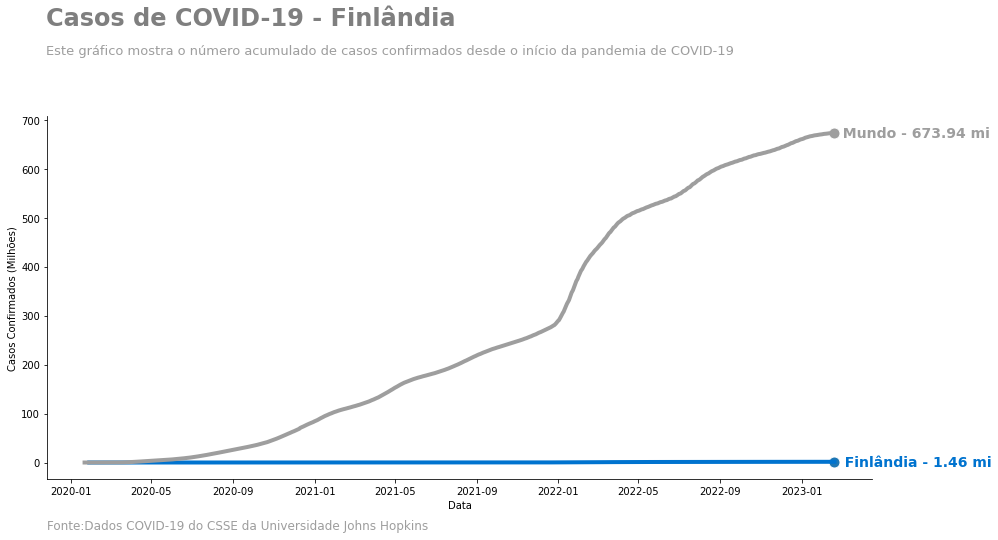

In [ ]:
#@title
#configurando as fontes
plt.rcParams['font.family'] = 'Arial'

# configurando as cores 
blue = '#0073CF'
gray = '#7F7F7F'
gray_text = "#9E9E9E"
# separando os dados 
total_case = df_fl[['date', 'total_cases']].copy()
case_world = world[['date', 'total_cases']].copy()
case_world.date = pd.to_datetime(case_world.date,format='%Y-%m-%d')
# configurando o grafico
fig, ax = plt.subplots(figsize=(14,8),dpi=72)
point = total_case.tail(1)
point_world = case_world.tail(1)
sns.scatterplot(data=point, x='date', y='total_cases',palette=blue, s=120,  ax=ax)
sns.scatterplot(data=point_world, x='date', y='total_cases',color=gray_text, s=120,  ax=ax)
sns.lineplot(data=total_case, x='date', y='total_cases', color=blue, linewidth=4 ,ax=ax)
sns.lineplot(data=case_world, x='date', y='total_cases', color=gray_text, linewidth=4, ax=ax)
last_point = point['total_cases'].values[0]
text_number = np.divide(last_point,1000000).round(2)
last_date = point['date'].values[0]
ax.annotate(f"\n  Finlândia - {text_number} mi", xy=(last_date, last_point), xytext=(0.5, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=blue),
last_point_world = point_world['total_cases'].values[0]
text_number_world = np.divide(last_point_world,1000000).round(2)
last_date_world = point_world['date'].values[0]
ax.annotate(f"\n\n  Mundo - {text_number_world} mi", xy=(last_date_world, last_point_world), xytext=(-1, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=gray_text),
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Casos Confirmados (Milhões)")
ax.set_xlabel("Data")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.text(x=-0.001, y=1.250, s='Casos de COVID-19 - Finlândia ', fontsize=24, color=gray, fontweight='bold', transform=ax.transAxes)
ax.text(-0-0.001, 1.170,'Este gráfico mostra o número acumulado de casos confirmados desde o início da pandemia de COVID-19', fontsize=13, color=gray_text, transform=ax.transAxes)
ax.set_yticklabels([-1, 0, 100, 200, 300, 400, 500, 600, 700])
#rodapé
ax.text(x=-0, y=-0.14, s='Fonte:Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color=gray_text, transform=ax.transAxes)


plt.tight_layout()

#### `07/03/2020` - **primeira morte por coronavírus na Finlandia.**



Em 20 de março de 2020, a primeira morte relacionada ao coronavírus foi confirmada na Finlândia. De acordo com o Instituto Nacional de Saúde e Bem-Estar (THL), a pessoa que morreu era muito idosa e vivia na área do distrito hospitalar de Helsinque e Uusimaa.A fim de proteger a privacidade, nenhuma informação adicional é fornecida sobre a morte. A THL afirmou que, embora a doença seja geralmente leve para a maioria das pessoas, pode ser grave para os idosos, especialmente aqueles com doenças subjacentes.

* **O Presidente da República, Sauli Niinistö , expressa suas condolências pela morte causada pelo coronavirus**



In [ ]:
#@title
%%html
<html lang="en">
<body>
<div class="testimonial-container">
  <div class="testimonial">
    <p class="testimonial-text">- Recebi informações confirmadas de que o coronavírus fez sua primeira vítima na Finlândia. Participo do luto dos parentes e entes queridos do falecido. Ao mesmo tempo, esta é uma indicação de que a epidemia de corona na Finlândia está passando para o próximo estágio cada vez mais grave. Desejo força aos entes queridos do falecido.</p>
    <p class="testimonial-author">Sauli Niinist</p>
    <div class="testimonial-image-container">
      <img src="https://www.presidentti.fi/wp-content/uploads/2018/11/Sauli_Niinisto.jpg" class="testimonial-image">
    </div>
  </div>
</div>
</body>
<style>
.testimonial-container {
  width: 40%;
  margin:50px 0 0 0;;
  text-align: left;
}

.testimonial {
  background-color: white;
  padding: 40px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
  display: flex;
  align-items: center;
  justify-content: center;
  flex-direction: column;
  
}

.testimonial-text {
  font-size: 18px;
  font-weight: bold;
  margin-bottom: 20px;
  color: #333;



}

.testimonial-author {
  color:#7F7F7F;
  font-size: 16px;

}

.testimonial-image-container {
  width: 75px;
  height: 75px;
  border-radius: 50%;
  border: 5px solid #0077be;
  padding: 0px;
  margin-top: 20px;
  display: flex;
  align-items: center;
  justify-content: center;


}

.testimonial-image {
  width: 70px;
  height: 70px;
  border: 3px solid #fff;
  border-radius: 50%;
  object-fit: cover;
}


}
</style>

<script>
window.onload = function() {
  const testimonialContainer = document.querySelector('.testimonial-container');
  testimonialContainer.style.opacity = 1;
};
</script>

* **Este é um resumo da notícia publicada no "Ilta-Sanomat", um dos maiores jornais diários da Finlândia, publicado em Helsinki. Fundado em 1932, o jornal é conhecido por sua cobertura abrangente de notícias nacionais e internacionais, esportes, entretenimento, tecnologia e outros assuntos de interesse para seus leitores. Você pode ler a notícia completa através deste [link](https://www.is.fi/kotimaa/art-2000006448047.html).**

A Finlândia relatou sua primeira morte por COVID-19 no dia 21/03/2020, mas essa informação pode não representar o número real de óbitos ocorridos no país. Quando verificamos as informações obtidas pelos dados do nosso dataset, **a primeira morte de fato ocorreu no dia 07/03/2020**. Isso nos deixa com algumas perguntas: **por que o governo finlandês não relatou essa morte? Será que houve uma negligência por parte do governo em relatar os números de mortes precisos ao público?**

In [ ]:
pd.DataFrame(df_clean[['iso_code','continent', 'location', 'date', 'total_deaths']].loc[39]).T

,iso_code,continent,location,date,total_deaths
39,FIN,Europe,Finland,2020-03-07,1.0


A falta de relato oficial sobre esse primeiro caso de morte pode ter sido causada por diversos fatores, incluindo processos essenciais, como a inspeção post-mortem e testes laboratoriais para confirmação da causa da morte.

A codificação manual das certidões de óbito também pode causar atrasos significativos, especialmente em situações de grande aumento no número de mortes, como foi o caso na Finlândia. No entanto, **como pode haver atraso em 6 registros de mortes, mas um único registro no dia 20/03/2020 foi relatado logo no dia seguinte?**

Apesar de todos esses questionamentos, é importante lembrar que assim como os numeros de casos, os números de mortes relatados em um dia específico podem não representar o número real de óbitos ocorridos neste período. Por exemplo, enquanto a Finlandia considerou a morte do dia 20/03/2020 como sua primeira morte relacionada ao COVID-19,  já se somavam um total de 7 mortes no dia.

In [ ]:
pd.DataFrame(df_fl[['iso_code','continent', 'location', 'date', 'total_deaths', 'new_deaths']].loc[52]).T

,iso_code,continent,location,date,total_deaths,new_deaths
52,FIN,Europe,Finland,2020-03-20,7.0,1.0


* Para obter uma visão mais precisa da situação, é necessário considerar o número de mortes acumuladas ao longo do tempo, e não apenas o número de mortes relatadas em um único dia.

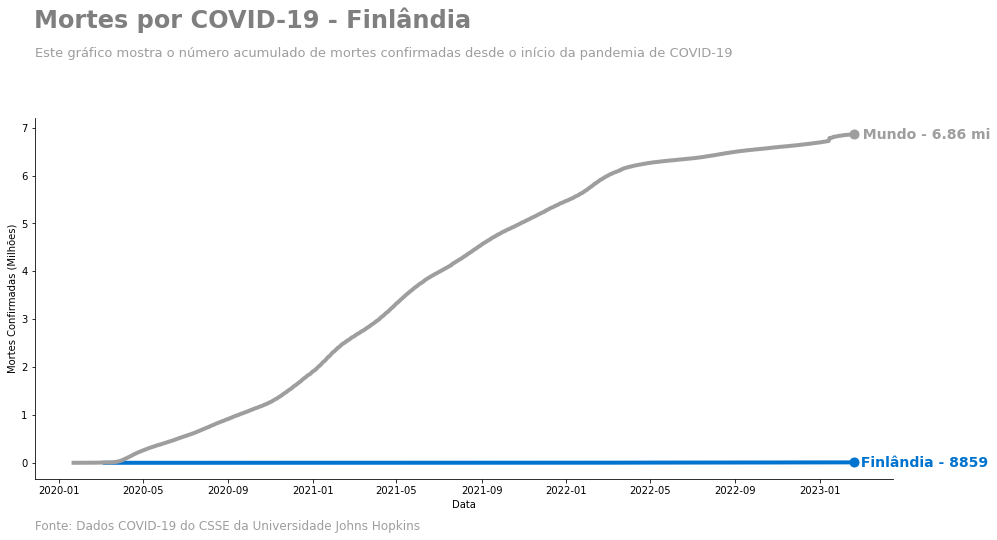

In [ ]:
#@title
total_death = df_fl[['date', 'total_deaths']].copy()
world_death = world[['date', 'total_deaths']].copy()
world_death.date = pd.to_datetime(world_death.date,format='%Y-%m-%d')
# configurando o grafico
fig, ax = plt.subplots(figsize=(14,8),dpi=72)
point = total_death.tail(1)
point_world = world_death.tail(1)
sns.scatterplot(data=point_world, x='date', y='total_deaths',color=gray_text, s=120,  ax=ax)
sns.scatterplot(data=point, x='date', y='total_deaths',color=blue, s=120,  ax=ax)
sns.lineplot(data=total_death, x='date', y='total_deaths', color=blue, linewidth=4 ,ax=ax)
sns.lineplot(data=world_death, x='date', y='total_deaths', color=gray_text, linewidth=4, ax=ax)
last_point = point['total_deaths'].values[0]
last_date = point['date'].values[0]
ax.annotate(f"\n \n Finlândia - {int(last_point)}", xy=(last_date, last_point), xytext=(2, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=blue)
last_point_world = point_world['total_deaths'].values[0]
last_date_world = point_world['date'].values[0]
text_number_world = np.divide(last_point_world,1000000).round(2)
ax.annotate(f"\n\n  Mundo - {text_number_world} mi", xy=(last_date_world, last_point_world), xytext=(-1, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=gray_text)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Mortes Confirmadas (Milhões)")
ax.set_xlabel("Data")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.text(x=-0.001, y=1.250, s='Mortes por COVID-19 - Finlândia ', fontsize=24, color=gray, fontweight='bold', transform=ax.transAxes)
ax.text(-0, 1.170,'Este gráfico mostra o número acumulado de mortes confirmadas desde o início da pandemia de COVID-19', fontsize=13, color=gray_text, transform=ax.transAxes)
#rodapé
ax.text(x=-0, y=-0.14, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color=gray_text, transform=ax.transAxes)
ax.set_yticklabels([-1, 0, 1, 2, 3, 4, 5, 6, 7])



plt.tight_layout()

#### **Quanto tempo até a primeira morte após o primeiro caso de COVID-19?**

*  Uma das informações importantes para entender a evolução da doença é o tempo decorrido entre o primeiro caso e a primeira morte registrada. Isso pode ajudar a avaliar a rapidez da disseminação do vírus.

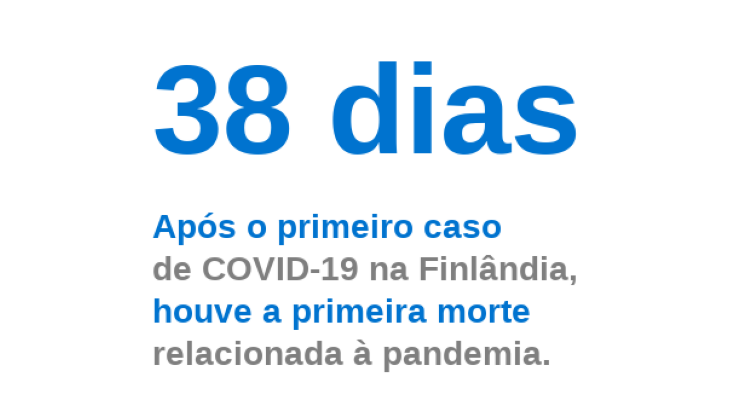

In [ ]:
#@title
days = str(total_death[total_death.notnull().all(axis=1)].date.loc[39] - total_case[total_case.notnull().all(axis=1)].date.loc[1])[:2]
img = Image.new("RGB", (600, 325), (255, 255, 255))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 105)
font_second = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 28)

text_width, text_height = draw.textsize(f"{int(days)} dias", font=font)
text_x = (img.width - text_width) / 2
text_y = (img.height - text_height) / 2
draw.text((120, 25), f"{int(days)} dias", fill=(0, 115, 207), font=font)

text_width, text_height = draw.textsize("após o primeiro caso", font=font_second)
text_x = (img.width - text_width) / 2
text_y = (img.height + text_height) / 2
draw.text((120, 105), "\n\nApós o primeiro caso", fill=(0, 115, 207), font=font_second)
draw.text((120, 170), "\nde COVID-19 na Finlândia,", fill=(127, 127, 127), font=font_second)
draw.text((120, 175), "\n\nhouve a primeira morte", fill=(0, 115, 207), font=font_second)
draw.text((120, 240), "\nrelacionada à pandemia.", fill=(127, 127, 127), font=font_second)


fig, ax = plt.subplots(figsize=(13,8), dpi=72)
ax.set_axis_off()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.imshow(img)
plt.show()


###  **4.Como a Finlândia se compara as demais nações nórdicas❔** 


A Finlândia apresenta uma taxa de mortalidade bruta relativamente baixa em comparação com a média global, cerca de 0,61%, o que sugere que o país lidou bem com a pandemia. No entanto, é importante avaliar o desempenho da Finlândia em relação a outros países nórdicos, como Dinamarca, Islândia, Noruega e Suécia, que compartilham várias características em comum. Esses países têm sistemas de bem-estar social desenvolvidos, baixos níveis de desigualdade, clima frio, alta qualidade de vida, economias mistas, liderança em políticas ambientais e herança cultural e histórica semelhante.

* Nesse sentido, é necessário examinar como a Finlândia se destaca em relação a esses países no que se refere à pandemia



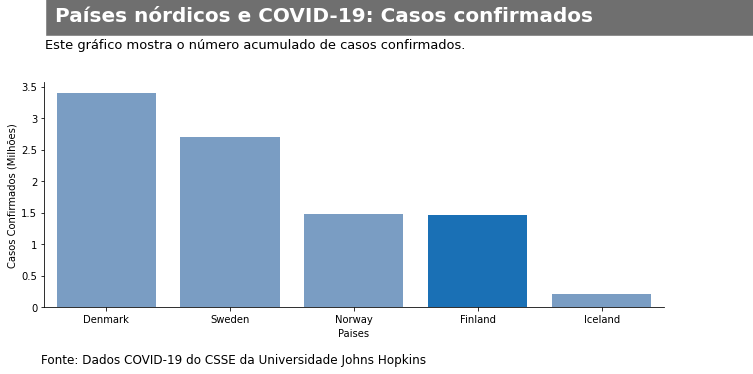

In [ ]:
#@title
gray_bar = '#333333'
cases_nordic = df_nordic.pivot_table('total_cases', 'location', 'date').T.tail(1).copy()
cases_nordic = pd.DataFrame({key: value for key, value  in zip(['location', 'cases'],[cases_nordic.columns.values, cases_nordic.values[:][0]])})
my_palette = ["#6E9CCF", "#6E9CCF", "#6E9CCF", '#0073CF', '#6E9CCF']
nordic = df_nordic.tail(1)
fig, ax = plt.subplots(figsize=(10.8, 6), dpi=72)
sns.barplot(data=cases_nordic.sort_values(by='cases', ascending=False), y='cases', x='location', palette=my_palette)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3,3.5])
ax.set_ylabel("Casos Confirmados (Milhões)")
ax.set_xlabel("Paises")
ax.text(0.017, 1.250, 'Países nórdicos e COVID-19: Casos confirmados                      ', 
        fontsize=20, fontweight='semibold',va='bottom', color='white', 
        bbox=dict(facecolor=gray_bar, alpha=0.7, linewidth=1, edgecolor='gray', pad=9), transform=ax.transAxes)
ax.text(0.001, 1.150,'Este gráfico mostra o número acumulado de casos confirmados.', fontsize=13, color='black', transform=ax.transAxes)
ax.text(x=-0.0045, y=-0.25, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='black', transform=ax.transAxes)
plt.tight_layout()

Quando comparamos o numero de casos nos paises nordicos, podemos tirar alguns insights valiosos:

* A Dinamarca tem o maior número absoluto de casos confirmados de COVID-19 entre os países nórdicos, com um total de 3.402.001, seguida pela Suécia com 2.697.159.

* A Noruega, por outro lado, apresenta o terceiro menor número de casos confirmados.

* **A Finlândia tem um número relativamente baixo de casos confirmados de COVID-19 em comparação com outros países da região, seguindo como penultimo colocado em termos de casos confirmados.** 


* A Islândia é o país nórdico com o menor número de casos confirmados de COVID-19 em termos absolutos, mas é importante lembrar que a Islândia tem uma população significativamente menor em comparação com outros países nórdicos.

* Por fim, Podemos afirmar que **há aproximadamente 9.248.200 casos confirmados de COVID-19 em países nórdicos**. **A Finlândia contribui com cerca de 15,8% desse total, com 1.461.583 casos confirmados.**
 

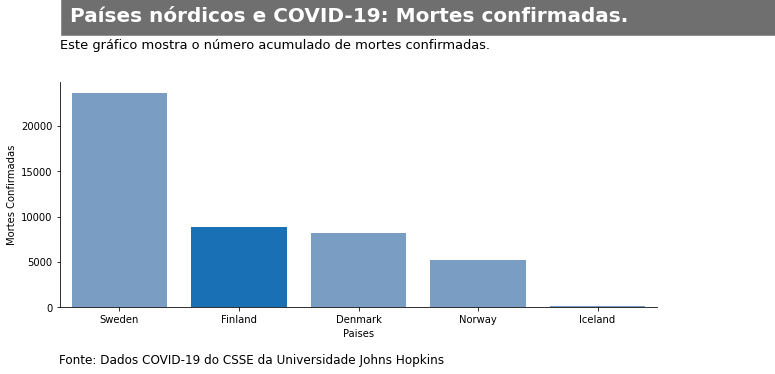

In [ ]:
#@title
deaths_nordic = df_nordic.pivot_table('total_deaths', 'location', 'date').T.tail(1).copy()
deaths_nordic = pd.DataFrame({key: value for key, value  in zip(['location', 'deaths'],[deaths_nordic.columns.values, deaths_nordic.values[:][0]])})
my_palette = ["#6E9CCF", '#0073CF', "#6E9CCF", "#6E9CCF", '#6E9CCF']
fig, ax = plt.subplots(figsize=(10.8, 6), dpi=72)
sns.barplot(data=deaths_nordic.sort_values(by='deaths', ascending=False), y='deaths', x='location', palette=my_palette)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Mortes Confirmadas")
ax.set_xlabel("Paises")
ax.text(0.017, 1.250, 'Países nórdicos e COVID-19: Mortes confirmadas.                    ' ,
        fontsize=20, fontweight='semibold',va='bottom', color='white', 
        bbox=dict(facecolor=gray_bar, alpha=0.7, linewidth=1, edgecolor='gray', pad=9), transform=ax.transAxes)
ax.text(-0, 1.150,'Este gráfico mostra o número acumulado de mortes confirmadas.', fontsize=13, color='black', transform=ax.transAxes)
ax.text(x=-0.001, y=-0.25, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='black', transform=ax.transAxes)
plt.tight_layout()

* Apesar de a Suécia liderar em número absoluto de mortes confirmadas por COVID-19 entre os países nórdicos, com um total de 23.634, é importante notar que a população sueca é consideravelmente maior que a de outros países da região.

* **A Finlândia é o segundo país em número de mortes confirmadas, com 8.859, o que corresponde a 19,2% do total de mortes na região (46.107), apesar de representar apenas 15,8% do total de casos confirmados.**

* A Noruega tem o segundo menor número de mortes confirmadas, com um total de 5.175, seguida pela Dinamarca, que ocupa a terceira posição, com 8.228 mortes confirmadas.

* A Islândia continua sendo o país com o menor número de casos e mortes confirmadas em comparação com os outros países nórdicos.




A taxa de mortalidade bruta é uma medida que expressa a proporção de mortes em relação ao total de casos de uma determinada doença. No caso da COVID-19, a taxa de mortalidade bruta é calculada pela divisão do número de mortes confirmadas acumuladas pelo número de casos confirmados acumulados da doença, multiplicado por 100 para expressar o resultado em porcentagem.  essa é uma métrica importante para avaliar o quão letal é uma doença em relação ao seu potencial de infecção.

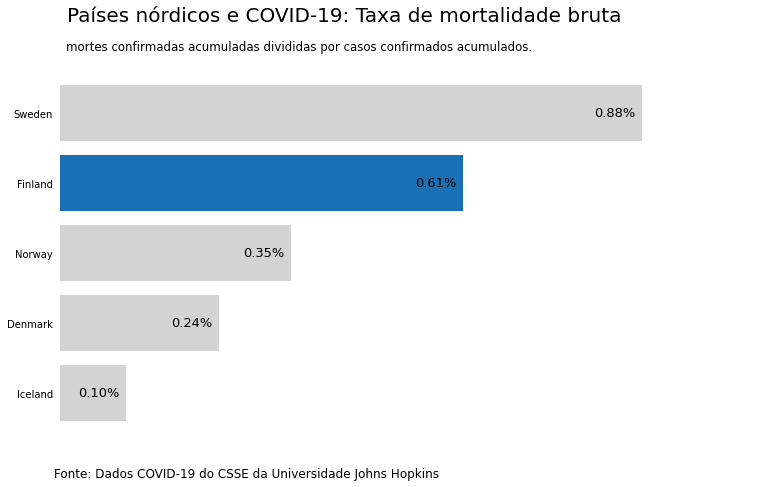

In [ ]:
#@title
mortality_rate = (np.divide(deaths_nordic['deaths'].values, cases_nordic['cases'].values)*100).round(2)
nordics = cases_nordic['location'].values
gray_light = "#D3D3D3"
df_mortality = pd.DataFrame({key:value for key, value in zip(['countries', 'mortality_rate'], [nordics, mortality_rate])})
fig, ax = plt.subplots(figsize=(10.8, 7), dpi=72)
bar_plot = sns.barplot(data=df_mortality.sort_values(by='mortality_rate', ascending=False), y='countries', x='mortality_rate', palette=[gray_light, blue, gray_light, gray_light, gray_light])
ax.tick_params(axis='y', which='both', left=False)
ax.set_xticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
for value, (index, row) in enumerate(df_mortality.sort_values(by='mortality_rate', ascending=False).iterrows()):
    x = row['mortality_rate']
    y = value
    width = bar_plot.containers[0][value].get_width()
    ax.text(x + -0.1 / 10, y + -0, '{:.2f}%'.format(x), ha='right', va='center', color='black',fontweight='ultralight', size=13)
ax.text(0.01, -1.250, 'Países nórdicos e COVID-19: Taxa de mortalidade bruta                     ' ,
        fontsize=20, fontweight='medium',va='bottom', color='black')
ax.text(0.01, 1.08,'mortes confirmadas acumuladas divididas por casos confirmados acumulados.', fontsize=11.8, color='black', transform=ax.transAxes)
ax.text(x=-0.01, y=-0.14, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='bLACK', transform=ax.transAxes)
ax.tick_params(axis='y', which='both', left=False)
plt.tight_layout()


* A Suécia teve uma taxa de mortalidade (0,88) por COVID mais alta do que as nações nórdicas vizinhas. Um artigo foi publicado pela ABC News, uma organização de notícias americana, em 24 de março de 2022, discute uma avaliação contundente da resposta da Suécia à pandemia de COVID-19. A avaliação, encomendada pelo governo sueco, identificou uma série de falhas na abordagem da Suécia para controlar a propagação do vírus. Segundo o relatório, a decisão da Suécia de confiar em medidas voluntárias, em vez de implementar bloqueios rígidos e outras restrições, levou a taxas mais altas de infecção e morte em comparação com os países vizinhos. O relatório também destacou a falta de coordenação entre as agências governamentais, bem como medidas inadequadas para proteger idosos e populações vulneráveis.Os resultados da avaliação foram controversos, com alguns defendendo a abordagem da Suécia como um modelo para equilibrar a saúde pública e as preocupações econômicas. No entanto, outros argumentam que o alto número de mortos no país, principalmente entre os idosos, sugere que uma resposta mais agressiva era necessária.Vale a pena notar que a avaliação foi conduzida por uma comissão independente, e o governo sueco reconheceu suas descobertas e prometeu fazer melhorias em sua resposta à pandemia no futuro. Você pode ler o artigo completo através deste [link](https://abcnews.go.com/Health/scathing-evaluation-swedens-covid-response-reveals-failures-control/story?id=83644832)

* **A Finlândia tem a segunda maior taxa de mortalidade entre os países nórdico(0,61)**. Em seguida, temos Noruega e Dinamarca entre as taxas de mortalidade relativamente mais baixas de (0,35 e 0,24).

* A Islândia é o país com a menor taxa de mortalidade (0,10) entre os países nórdicos, o que pode não ser surpreendente considerando a abordagem adotada pela nação insular para lidar com a pandemia de COVID-19. Em um artigo publicado pela NBC News em 15 de março de 2021, a estratégia da Islândia para gerenciar a disseminação do vírus é discutida em detalhes. A nação concentrou-se em um sistema rigoroso de teste, rastreamento, quarentena e isolamento para controlar a disseminação do vírus. Além disso, a Islândia impôs rigorosos controles de fronteira e quarentenas para viajantes, o que ajudou a evitar que o vírus se espalhasse pelo país. A NBC News é uma organização de notícias americana que produz conteúdo de interesse geral, incluindo cobertura de assuntos políticos e econômicos, entre outros. Você pode ler o artigo completo através deste [link](https://www.nbcnews.com/news/world/how-iceland-kept-coronavirus-pandemic-under-control-n1260635)

## **Conclusões**

A Finlândia tem sido amplamente elogiada por sua resposta eficaz à pandemia em comparação com muitos outros países em todo o mundo. Desde o registro do primeiro caso de COVID-19, o país já estava se preparando para possíveis ocorrências. Um dos fatores que pode ter contribuído para esse sucesso é a forte infraestrutura e um sistema de cuidados de saúde abrangente e acessível, que ajudou a garantir que os pacientes com COVID-19 recebessem os cuidados necessários.

Quando compararamos com outros paises nórdicos, os aspecto não é tão positivo, a Finlândia é o segundo país da região com o maior número de mortes e a maior taxa de mortalidade por COVID-19. É importante destacar, no entanto, que esses números podem ser influenciados por diversos fatores, como a densidade populacional e a idade média da população e entre outros.

Em suma, os  países nórdicos tiveram desempenho superior durante a pandemia de COVID-19 em relação a outros países de alta renda, tanto em termos de saúde pública quanto econômicos. As taxas de infecção e mortalidade foram relativamente baixas na região, com exceção da Suécia, que se baseou mais em recomendações do que em medidas obrigatórias para conter o vírus.